In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Most Run all the code above

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | dikson
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | lebu
Processing Record 4 of Set 13 | tasiilaq
Processing Record 5 of Set 13 | severo-kurilsk
Processing Record 6 of Set 13 | tuktoyaktuk
Processing Record 7 of Set 13 | vila franca do campo
Processing Record 8 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 13 | hermanus
Processing Record 10 of Set 13 | zhezkazgan
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | kruisfontein
Processing Record 13 of Set 13 | carnarvon
Processing Record 14 of Set 13 | soyo
Processing Record 15 of Set 13 | mar del plata
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | klaksvik
Processing Record 18 of Set 13 | celestun
Processing Record 19 of Set 13 | kalaleh
Processing Record 20 of Set 13 | mataura
Processing Record 21 of Set 13 | victor harbor
Process

Processing Record 30 of Set 16 | sept-iles
Processing Record 31 of Set 16 | stromness
Processing Record 32 of Set 16 | sao filipe
Processing Record 33 of Set 16 | eyl
Processing Record 34 of Set 16 | ulaangom
Processing Record 35 of Set 16 | halalo
City not found. Skipping...
Processing Record 36 of Set 16 | kiama
Processing Record 37 of Set 16 | souillac
Processing Record 38 of Set 16 | abu dhabi
Processing Record 39 of Set 16 | viedma
Processing Record 40 of Set 16 | abha
Processing Record 41 of Set 16 | lolua
City not found. Skipping...
Processing Record 42 of Set 16 | grand-santi
Processing Record 43 of Set 16 | cayenne
Processing Record 44 of Set 16 | terrace bay
Processing Record 45 of Set 16 | chuy
Processing Record 46 of Set 16 | ponta do sol
Processing Record 47 of Set 16 | linfen
Processing Record 48 of Set 16 | qandala
Processing Record 49 of Set 16 | karauzyak
City not found. Skipping...
Processing Record 50 of Set 16 | zyryanka
Processing Record 1 of Set 17 | thompson
Proc

Processing Record 15 of Set 20 | chichli
Processing Record 16 of Set 20 | lamar
Processing Record 17 of Set 20 | olavarria
Processing Record 18 of Set 20 | banda aceh
Processing Record 19 of Set 20 | auki
Processing Record 20 of Set 20 | lac du bonnet
Processing Record 21 of Set 20 | kaduna
Processing Record 22 of Set 20 | mecca
Processing Record 23 of Set 20 | salinopolis
Processing Record 24 of Set 20 | neiafu
Processing Record 25 of Set 20 | aurillac
Processing Record 26 of Set 20 | dawlatabad
Processing Record 27 of Set 20 | touros
Processing Record 28 of Set 20 | roebourne
Processing Record 29 of Set 20 | kirakira
Processing Record 30 of Set 20 | miri
Processing Record 31 of Set 20 | warrenton
Processing Record 32 of Set 20 | sinnamary
Processing Record 33 of Set 20 | bocas del toro
Processing Record 34 of Set 20 | bom jesus
Processing Record 35 of Set 20 | bereda
Processing Record 36 of Set 20 | chongqing
Processing Record 37 of Set 20 | dolores
Processing Record 38 of Set 20 | b

Processing Record 3 of Set 24 | chalmette
Processing Record 4 of Set 24 | sol-iletsk
Processing Record 5 of Set 24 | tambura
Processing Record 6 of Set 24 | saryshagan
City not found. Skipping...
Processing Record 7 of Set 24 | urucara
Processing Record 8 of Set 24 | lewiston
Processing Record 9 of Set 24 | belaya gora
Processing Record 10 of Set 24 | karaul
City not found. Skipping...
Processing Record 11 of Set 24 | popondetta
Processing Record 12 of Set 24 | lethem
Processing Record 13 of Set 24 | kuryk
Processing Record 14 of Set 24 | port hawkesbury
Processing Record 15 of Set 24 | elat
Processing Record 16 of Set 24 | san cristobal
Processing Record 17 of Set 24 | agadez
Processing Record 18 of Set 24 | amga
Processing Record 19 of Set 24 | polyarnyye zori
Processing Record 20 of Set 24 | egvekinot
Processing Record 21 of Set 24 | ahipara
Processing Record 22 of Set 24 | obluche
City not found. Skipping...
Processing Record 23 of Set 24 | tumannyy
City not found. Skipping...
Proc

In [14]:
len(city_data)

564

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,10.45,85,100,32.70,RU,2022-01-24 20:30:15
1,Punta Arenas,-53.1500,-70.9167,60.82,54,40,44.87,CL,2022-01-24 20:30:15
2,Lebu,-37.6167,-73.6500,62.73,69,1,17.49,CL,2022-01-24 20:30:16
3,Tasiilaq,65.6145,-37.6368,23.16,63,100,10.09,GL,2022-01-24 20:30:16
4,Severo-Kurilsk,50.6789,156.1250,21.56,69,98,9.37,RU,2022-01-24 20:30:16
5,Tuktoyaktuk,69.4541,-133.0374,6.80,85,40,16.11,CA,2022-01-24 20:30:16
6,Vila Franca Do Campo,37.7167,-25.4333,59.20,80,81,6.78,PT,2022-01-24 20:30:17
7,Hermanus,-34.4187,19.2345,70.81,93,5,6.76,ZA,2022-01-24 20:30:17
8,Zhezkazgan,47.8043,67.7144,0.52,87,5,7.36,KZ,2022-01-24 20:30:17
9,Albany,42.6001,-73.9662,28.62,53,57,1.01,US,2022-01-24 20:26:46


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',  'Wind Speed']

In [17]:
city_data_df = city_data_df[new_column_order]

In [4]:
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dikson,RU,2022-01-24 20:30:15,73.5069,80.5464,10.45,85,100,32.70
1,1,Punta Arenas,CL,2022-01-24 20:30:15,-53.1500,-70.9167,60.82,54,40,44.87
2,2,Lebu,CL,2022-01-24 20:30:16,-37.6167,-73.6500,62.73,69,1,17.49
3,3,Tasiilaq,GL,2022-01-24 20:30:16,65.6145,-37.6368,23.16,63,100,10.09
4,4,Severo-Kurilsk,RU,2022-01-24 20:30:16,50.6789,156.1250,21.56,69,98,9.37
5,5,Tuktoyaktuk,CA,2022-01-24 20:30:16,69.4541,-133.0374,6.80,85,40,16.11
6,6,Vila Franca Do Campo,PT,2022-01-24 20:30:17,37.7167,-25.4333,59.20,80,81,6.78
7,7,Hermanus,ZA,2022-01-24 20:30:17,-34.4187,19.2345,70.81,93,5,6.76
8,8,Zhezkazgan,KZ,2022-01-24 20:30:17,47.8043,67.7144,0.52,87,5,7.36
9,9,Albany,US,2022-01-24 20:26:46,42.6001,-73.9662,28.62,53,57,1.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Most Run this code to use City Data without running it again

In [6]:
# cities.csv

city_data_df_load = "weather_data/cities.csv"

# Read the School Data and Student Data and store into a Pandas DataFrame
city_data_df = pd.read_csv(city_data_df_load)

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

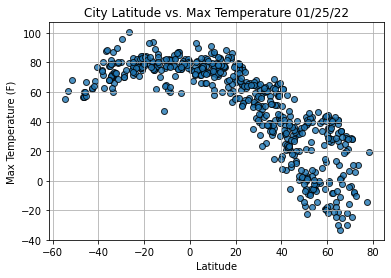

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

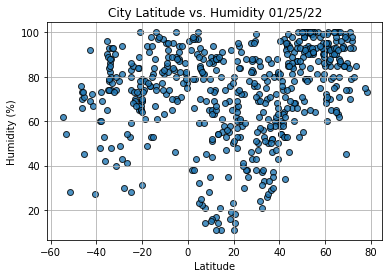

In [9]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.  Note, chart needs to be recreated but not be saved again
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

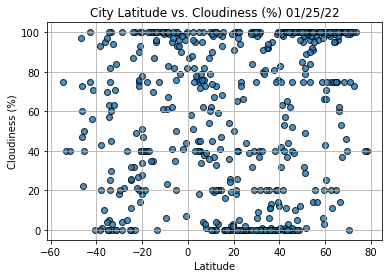

In [10]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.  Note, chart needs to be recreated but not be saved again
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

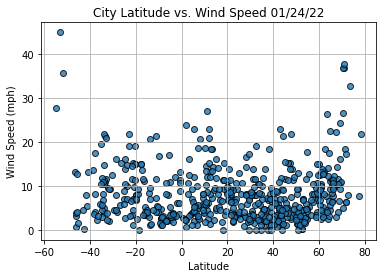

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.  Note, chart needs to be recreated but not be saved again
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                Mar Del Plata
Country                        AR
Date          2022-01-24 20:30:19
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    80.62
Humidity                       73
Cloudiness                     20
Wind Speed                    4.0
Name: 13, dtype: object

In [13]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
559    False
560     True
561     True
562     True
563    False
Name: Lat, Length: 564, dtype: bool

In [14]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dikson,RU,2022-01-24 20:30:15,73.5069,80.5464,10.45,85,100,32.70
3,3,Tasiilaq,GL,2022-01-24 20:30:16,65.6145,-37.6368,23.16,63,100,10.09
4,4,Severo-Kurilsk,RU,2022-01-24 20:30:16,50.6789,156.1250,21.56,69,98,9.37
5,5,Tuktoyaktuk,CA,2022-01-24 20:30:16,69.4541,-133.0374,6.80,85,40,16.11
6,6,Vila Franca Do Campo,PT,2022-01-24 20:30:17,37.7167,-25.4333,59.20,80,81,6.78


In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

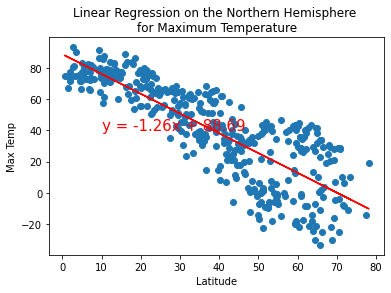

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
for Maximum Temperature', 'Max Temp',(10,40))

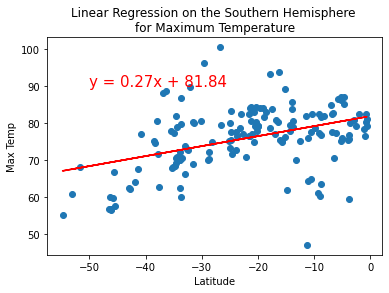

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
for Maximum Temperature', 'Max Temp',(-50,90))

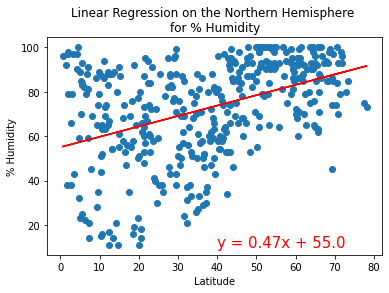

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
for % Humidity', '% Humidity',(40,10))

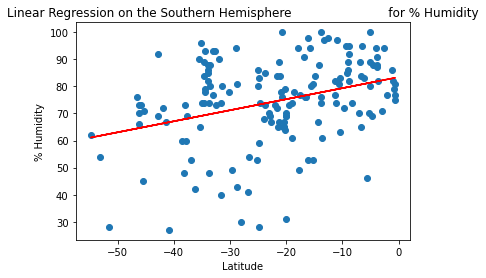

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

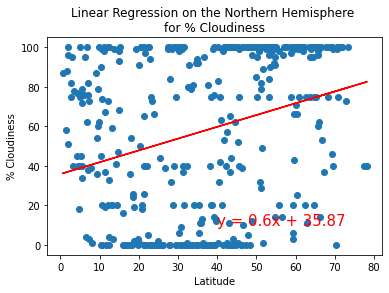

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
for % Cloudiness', '% Cloudiness',(40,10))

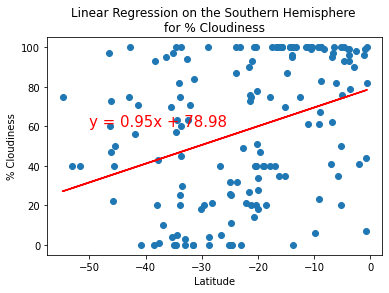

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
for % Cloudiness', '% Cloudiness',(-50,60))

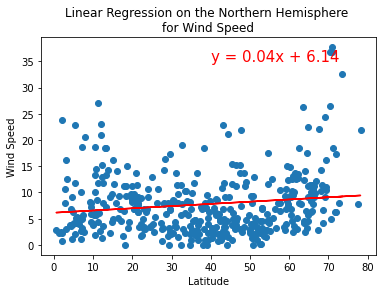

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
for Wind Speed', 'Wind Speed',(40,35))

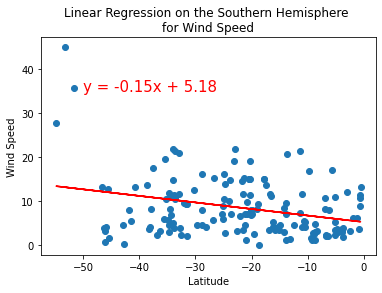

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
for Wind Speed', 'Wind Speed',(-50,35))